In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings("ignore")

### 2. Проверьте Х на пропуски и закодируйте категориальные данные, если это  необходимо

In [19]:
import pandas as pd
data = pd.read_csv('Country-data.csv')

X = data[['health', 'child_mort', 'life_expec']]

X.isnull().sum()


health        0
child_mort    0
life_expec    0
dtype: int64

### 3. Нормализуйте значения в матрице Х функцией MinMaxScaler()

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Создаем экземпляр класса MinMaxScaler
scaler = MinMaxScaler()

# Обучаем scaler на данных и одновременно преобразуем матрицу X
X_scaled = scaler.fit_transform(X)


### 4. C помощью метода локтя определите оптимальное количество кластеров и разделите данные на кластеры методом K-means

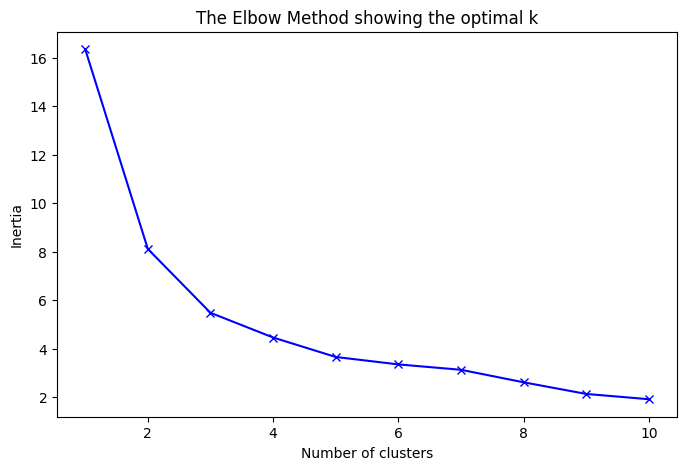

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(X_scaled)
    

    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


2) В методе K-means сначала случайно выбираются центры кластеров, 
затем объекты присваиваются ближайшему центру, затем центры пересчитываются, 
и процесс повторяется, пока центры не стабилизируются.

3) Оптимальное количество кластеров в K-means можно выбрать по методу локтя 
или силуэту, когда кривая перестает резко меняться.


### 5. Визуализируйте результаты кластеризации, выбрав для визуализации два параметра из матрицы Х.

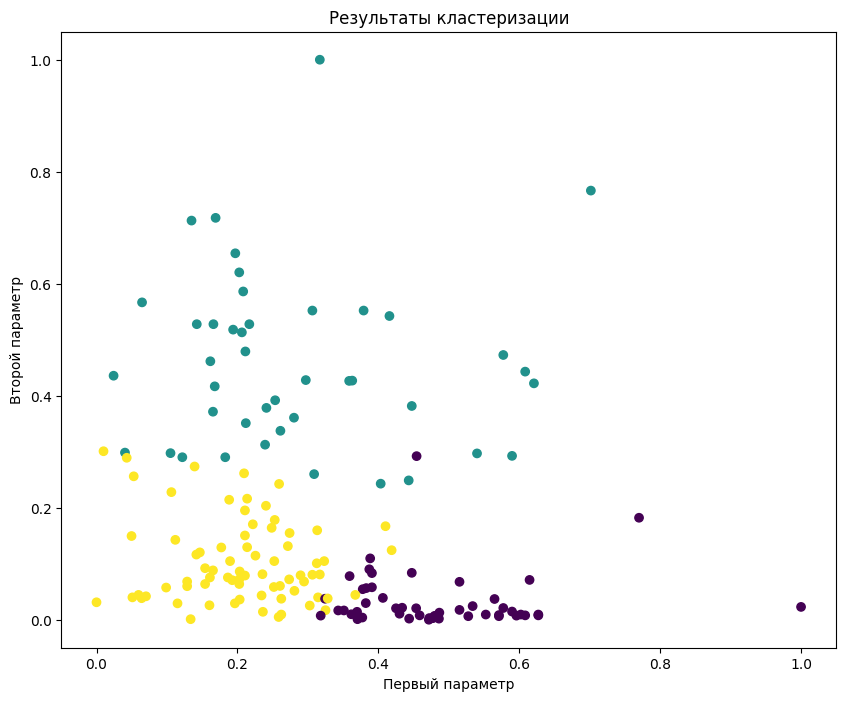

In [22]:
from sklearn.cluster import KMeans

optimal_k = 3
# Создаем экземпляр KMeans с оптимальным количеством кластеров
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)

# Обучаем модель и предсказываем кластеры
clusters = kmeans_opt.fit_predict(X_scaled)


import matplotlib.pyplot as plt

# Выберем первый и второй параметры для визуализации
x_axis = X_scaled[:, 0]  # Первый параметр
y_axis = X_scaled[:, 1]  # Второй параметр

# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=clusters, cmap='viridis')

# Добавляем заголовки и подписи осей
plt.title('Результаты кластеризации')
plt.xlabel('Первый параметр')
plt.ylabel('Второй параметр')

# Отображаем диаграмму
plt.show()


### 6. Разделите данные на кластеры методом иерархической кластеризации, выберите с помощью дендрограммы оптимальное количество кластеров.

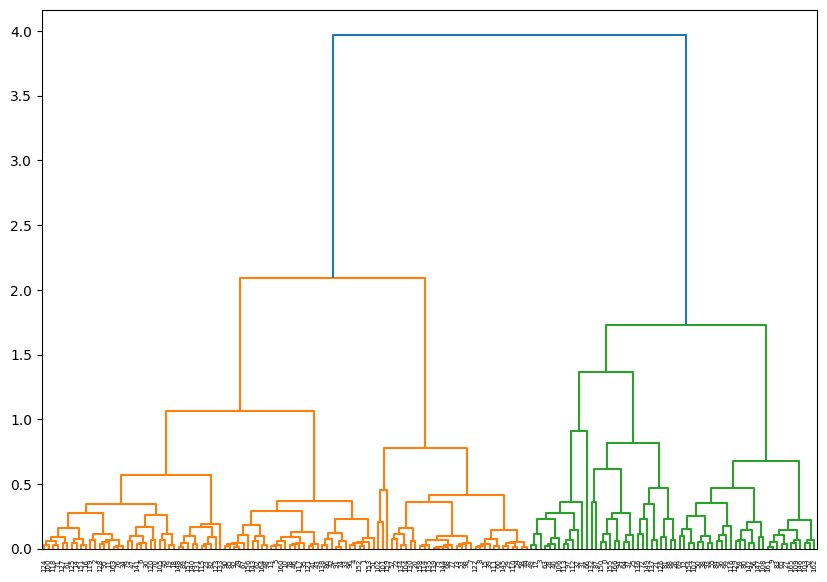

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Выполняем иерархическую кластеризацию
linked = linkage(X_scaled, 'ward')

# Строим дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


In [24]:
#Дендрограмма — это визуализатор, используемый для представления результатов иерархической кластеризации. 
#Она показывает степень близости отдельных объектов и кластеров, а также наглядно демонстрирует в графическом виде последовательность их объединения или разделения. 
#Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. 

### 7. Визуализируйте результаты кластеризации методом иерархической кластеризации.


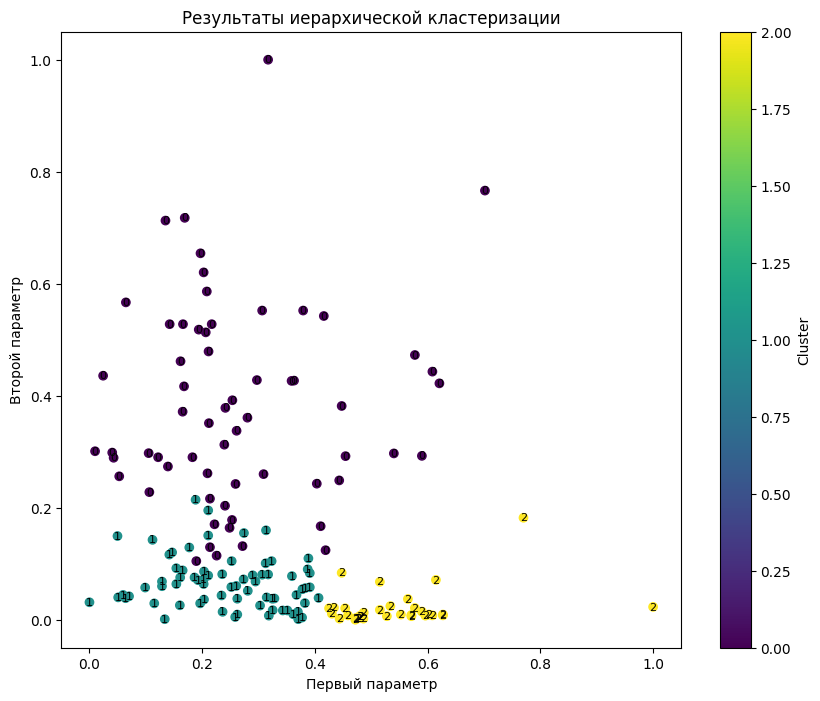

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Создаем экземпляр AgglomerativeClustering с оптимальным количеством кластеров
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)

# Обучаем модель и предсказываем кластеры
hc_labels = agg_clustering.fit_predict(X_scaled)



# Выберем первый и второй параметры для визуализации
x_axis = X_scaled[:, 0]
y_axis = X_scaled[:, 1]

# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=hc_labels, cmap='viridis')

# Добавляем заголовки и подписи осей
plt.title('Результаты иерархической кластеризации')
plt.xlabel('Первый параметр')
plt.ylabel('Второй параметр')
plt.colorbar(label='Cluster')

# Добавление подписей групп
for i, label in enumerate(hc_labels):
    plt.text(x_axis[i], y_axis[i], str(label), fontsize=8, color='black', ha='center', va='center')

# Отображаем диаграмму
plt.show()



### 8. Оцените качество кластеризации методами K-means и иерархической кластеризации, рассчитав пару метрик качества кластеризации (модуль sklearn.metrics). Например, силуэт для выборки silhouette_score() и др

In [26]:
from sklearn.metrics import silhouette_score

# Рассчитываем коэффициент силуэта для K-means
silhouette_kmeans = silhouette_score(X_scaled, kmeans_opt.labels_)

# Рассчитываем коэффициент силуэта для иерархической кластеризации
silhouette_hc = silhouette_score(X_scaled, hc_labels)

print(f"Коэффициент силуэта для K-means: {silhouette_kmeans}")
print(f"Коэффициент силуэта для иерархической кластеризации: {silhouette_hc}")


#  Коэффициент силуэта - это метрика, оценивающая качество кластеризации, со значениями от -1 до 1. Более высокие значения указывают на лучше определенные кластеры.

Коэффициент силуэта для K-means: 0.4065917802395264
Коэффициент силуэта для иерархической кластеризации: 0.373176634266542


### 9. Из датасета выберите любой конкретный объект (если вы делаете модель на датасете Country-data.csv, то выберите любую страну) и визуализируйте этот объект в виде точки отличного цвета и размера на графике кластеров (пример на рисунке, точка пурпурного цвета).

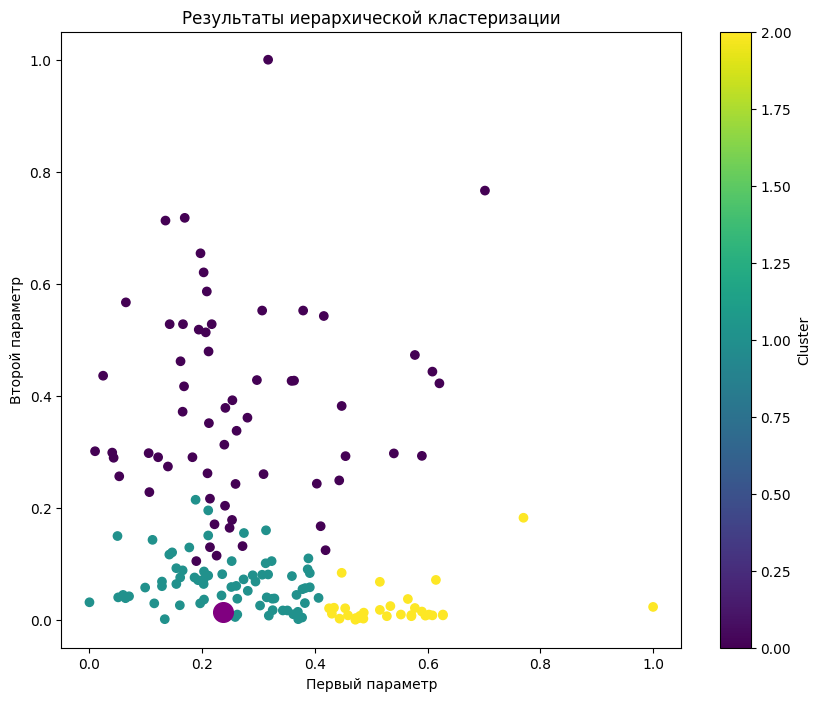

In [27]:
import matplotlib.pyplot as plt

# Выберем первый и второй параметры для визуализации
x_axis = X_scaled[:, 0]  # Первый параметр
y_axis = X_scaled[:, 1]  # Второй параметр

# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=hc_labels, cmap='viridis')

# Добавляем заголовки и подписи осей
plt.title('Результаты иерархической кластеризации')
plt.xlabel('Первый параметр')
plt.ylabel('Второй параметр')
plt.colorbar(label='Cluster')

# Находим индекс страны "Беларусь" в датасете
belarus_index = data.index[data['country'] == 'Belarus'][0]

# Визуализируем страну "Беларусь" в виде точки отличного цвета и размера
plt.scatter(X_scaled[belarus_index, 0], X_scaled[belarus_index, 1], color='purple', s=200)

# Отображаем диаграмму
plt.show()


In [28]:
"""
1) Задачи кластеризации в машинном обучении решаются для группировки 
похожих объектов в одни кластеры.

2) В методе K-means сначала случайно выбираются центры кластеров, 
затем объекты присваиваются ближайшему центру, затем центры пересчитываются, 
и процесс повторяется, пока центры не стабилизируются.

3) Оптимальное количество кластеров в K-means можно выбрать по методу локтя 
или силуэту, когда кривая перестает резко меняться.

4) В иерархической кластеризации объекты постепенно объединяются в кластеры 
до тех пор, пока все объекты не окажутся в одном кластере.

5) Дендрограмма в методе иерархической кластеризации используется для 
визуализации процесса объединения объектов в кластеры и выбора 
оптимального числа кластеров.

6) Метрики, такие как силуэт и индекс Дэвиса-Болдуина, используются для 
оценки качества кластеризации по мере разделения кластеров и их компактности.
"""

'\n1) Задачи кластеризации в машинном обучении решаются для группировки \nпохожих объектов в одни кластеры.\n\n2) В методе K-means сначала случайно выбираются центры кластеров, \nзатем объекты присваиваются ближайшему центру, затем центры пересчитываются, \nи процесс повторяется, пока центры не стабилизируются.\n\n3) Оптимальное количество кластеров в K-means можно выбрать по методу локтя \nили силуэту, когда кривая перестает резко меняться.\n\n4) В иерархической кластеризации объекты постепенно объединяются в кластеры \nдо тех пор, пока все объекты не окажутся в одном кластере.\n\n5) Дендрограмма в методе иерархической кластеризации используется для \nвизуализации процесса объединения объектов в кластеры и выбора \nоптимального числа кластеров.\n\n6) Метрики, такие как силуэт и индекс Дэвиса-Болдуина, используются для \nоценки качества кластеризации по мере разделения кластеров и их компактности.\n'